In [526]:
import pandas as pd
import seaborn as sns

In [527]:
df = pd.read_csv("jj.csv")
df

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61
...,...,...
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02


## MARK: ปรับ time string to Timestamp

In [528]:
df["date"] = pd.to_datetime(df.date)
df = df.set_index("date")
df.columns = ["EPS"]
df

,EPS
date,
1960-01-01,0.71
1960-04-01,0.63
1960-07-02,0.85
1960-10-01,0.44
1961-01-01,0.61
...,...
1979-10-01,9.99
1980-01-01,16.20
1980-04-01,14.67


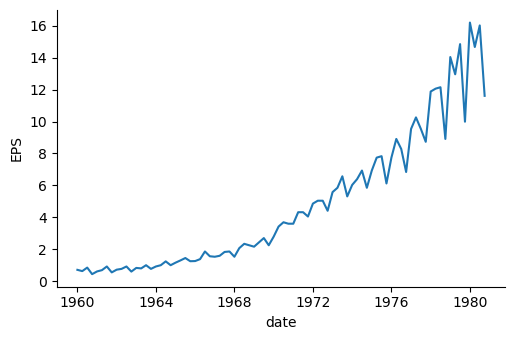

In [529]:
sns.relplot(df, x=df.index, y="EPS", kind="line", height=3.5, aspect=1.5)

## MARK: แบ่งข้อมูลช่วงท้ายๆ ให้เป็นชุด Test เนื่องจากเป็นช่วงใกล้เวลาปัจจุบัน

In [530]:
train = df.iloc[:-4]
test = df.iloc[-4:]
test

,EPS
date,
1980-01-01,16.20
1980-04-01,14.67
1980-07-02,16.02
1980-10-01,11.61


## MARK: สร้าง Baseline สำหรับเปรียบเทียบ

### Historical mean
ใช้ EPS.mean ของชุด train

In [531]:
hist_mean = train.EPS.mean()
hist_mean

4.308499987499999

In [532]:
baseline = test.copy()
baseline.columns = ["actual"]
baseline

,actual
date,
1980-01-01,16.20
1980-04-01,14.67
1980-07-02,16.02
1980-10-01,11.61


In [533]:
baseline["hist_mean"] = hist_mean
baseline

,actual,hist_mean
date,,
1980-01-01,16.20,4.3085
1980-04-01,14.67,4.3085
1980-07-02,16.02,4.3085
1980-10-01,11.61,4.3085


### Last Value
ใช้ EPS ของชุด train ตัวสุดท้าย

In [534]:
last_value = train.EPS[-1]
last_value

9.99

In [535]:
baseline["last_value"] = last_value
baseline

,actual,hist_mean,last_value
date,,,
1980-01-01,16.20,4.3085,9.99
1980-04-01,14.67,4.3085,9.99
1980-07-02,16.02,4.3085,9.99
1980-10-01,11.61,4.3085,9.99


### Last Season mean
1-4 Q ล่าสุดแต่เป็นค่า mean

In [536]:
last_seaseon = train.EPS[-4:]
last_seaseon

date
1979-01-01    14.04
1979-04-02    12.96
1979-07-02    14.85
1979-10-01     9.99
Name: EPS, dtype: float64

In [537]:
last_seaseon.mean()

12.96

In [538]:
baseline["last_seaseon_mean"] = last_seaseon.mean()
baseline

,actual,hist_mean,last_value,last_seaseon_mean
date,,,,
1980-01-01,16.20,4.3085,9.99,12.96
1980-04-01,14.67,4.3085,9.99,12.96
1980-07-02,16.02,4.3085,9.99,12.96
1980-10-01,11.61,4.3085,9.99,12.96


### Last Season value
1-4 Q ล่าสุด

In [539]:
list(last_seaseon)

[14.04, 12.96, 14.85, 9.99]

In [540]:
baseline["last_seaseon"] = list(last_seaseon)
baseline

,actual,hist_mean,last_value,last_seaseon_mean,last_seaseon
date,,,,,
1980-01-01,16.20,4.3085,9.99,12.96,14.04
1980-04-01,14.67,4.3085,9.99,12.96,12.96
1980-07-02,16.02,4.3085,9.99,12.96,14.85
1980-10-01,11.61,4.3085,9.99,12.96,9.99


# MARK: Evaluation

In [541]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse

In [542]:
mape(baseline.actual, baseline.hist_mean)
# hist_mean และ actual(ค่าจริง) มีความคาดเคลื่อน 70%

0.7000752579965119

In [543]:
mape(baseline.actual, baseline.last_value)
# last_value และ actual(ค่าจริง) มีความคาดเคลื่อน 30%

0.30457277908606534

In [544]:
mape(baseline.actual, baseline.last_seaseon_mean)

0.155963680725103

In [545]:
mape(baseline.actual, baseline.last_seaseon) #last_seaseon ดีที่สุด มี mape ต่ำสุด

0.11561658552433654

In [546]:
mse(baseline.actual, baseline.hist_mean)
# hist_mean และ actual(ค่าจริง) มีความคาดเคลื่อน 109.80 แต่เราตีความไม่ได้ว่ามันมากหรือน้อย จำเป็นตัองมีตัวเปรียบเทียบเพิ่มเติม

109.80989750791251

In [547]:
mse(baseline.actual, baseline.last_value)
# hist_mean และ actual(ค่าจริง) มีความคาดเคลื่อน 24 
# ตอนนี้เราจะเห็นแล้วว่า mse last_value มีค่าดีกว่า mse hist_mean

24.862949999999994

In [548]:
mse(baseline.actual, baseline.last_seaseon_mean)

6.151949999999996

In [549]:
mse(baseline.actual, baseline.last_seaseon) #last_seaseon ดีที่สุด มี mse ต่ำสุด

2.8957499999999987

# Check Stationarity

## MARK: Autocorrelation (Check Stationarity)

In [550]:
from statsmodels.graphics.tsaplots import plot_acf

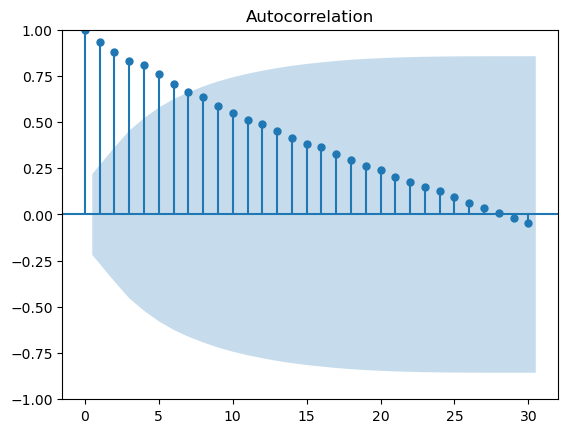

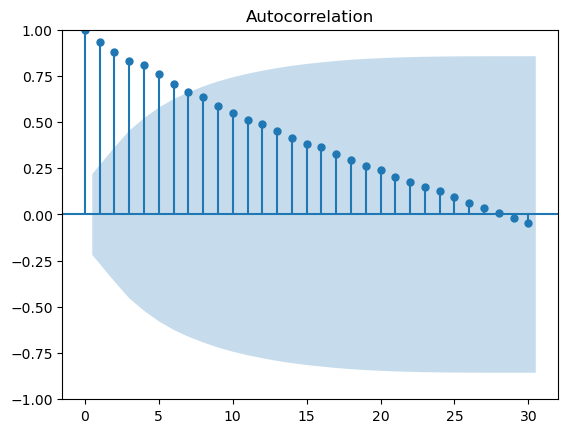

In [551]:
plot_acf(train, lags=30) #ตอนนี้ข้อมูลยังไม่ Stationrity
#พื้นที่สีฟ้าคือ Confidence interval ถ้าจุดไหนอยู่ในพื้นที่นี้ ให้ตีความว่ามีค่าติด 0 ถือว่าไม่มีความสัมพันธ์กับ่คาปัจจุบัน

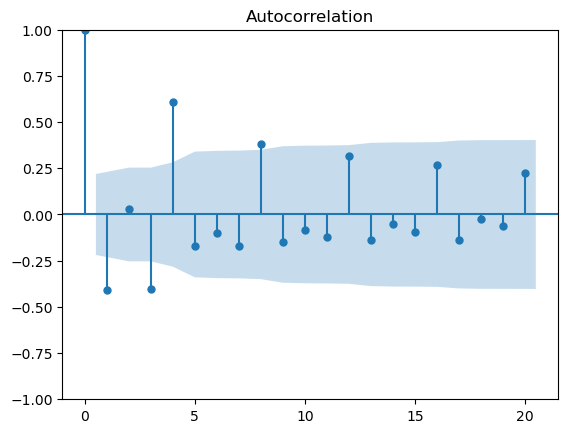

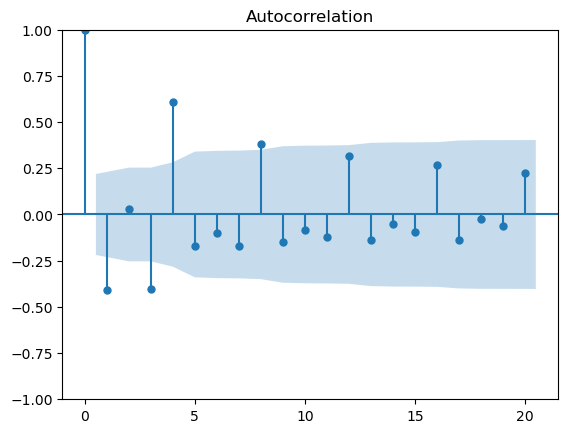

In [552]:
plot_acf(train.diff(), missing="drop") #ลอง Diffencing เพื่อ remove trend

## MARK: Augmented Dickey-Fuller Test (Check Stationarity)

In [553]:
from statsmodels.tsa.stattools import adfuller

In [554]:
adfuller(train)
#Result from test 4.9905254433914985
#p-value = 1.0
#dof = 75
# """
# alpha
# {'1%': -3.520713130074074,
#   '5%': -2.9009249540740742,
#   '10%': -2.5877813777777776},
# """

(4.9905254433914985,
 1.0,
 4,
 75,
 {'1%': -3.520713130074074,
  '5%': -2.9009249540740742,
  '10%': -2.5877813777777776},
 74.54342718240567)

In [555]:
adfuller(train.diff().dropna())

(1.054981878054868,
 0.9948134914948296,
 12,
 66,
 {'1%': -3.5335601309235605,
  '5%': -2.9064436883991434,
  '10%': -2.590723948576676},
 81.42398838181796)

In [556]:
adfuller(train.diff().diff().dropna())
#p-value ต่ำกว่า Alpha หรือ 0.05 ถือว่า stationarity แล้ว

(-6.783312453076931,
 2.467846485129056e-09,
 7,
 70,
 {'1%': -3.5274258688046647,
  '5%': -2.903810816326531,
  '10%': -2.5893204081632653},
 80.3708206300797)

<AxesSubplot:xlabel='date'>

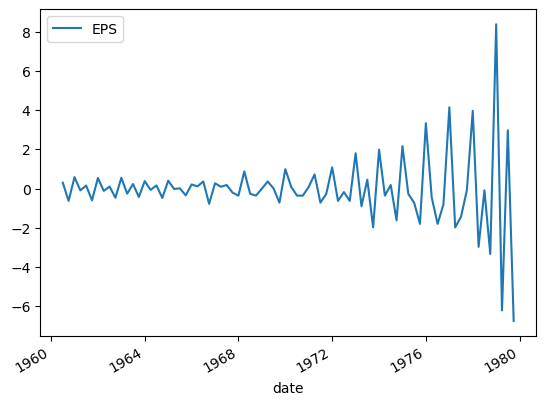

In [557]:
train.diff().diff().plot()

## MARK: Model Random Walk
โมเดล Random Walk มักถูกใช้ในการตรวจสอบ Stationarity ของข้อมูลเวลา (time series data) หรือความคงที่ของความคาดหวังและความแปรปรวนของข้อมูลในระหว่างเวลา ความคงที่ของข้อมูลเวลาเป็นสิ่งสำคัญเมื่อคุณต้องการใช้วิธีการวิเคราะห์หรือโมเดลที่พึงพอใจ เพราะหากข้อมูลไม่มีความคงที่ (non-stationary) อาจทำให้ผลลัพธ์ของการวิเคราะห์ไม่ถูกต้องหรือไม่มีความหมาย

In [558]:
import numpy as np

In [559]:
epsilons = np.random.standard_normal(81) #สร้าง epsilons โดยสุ่มขึ้นมา 81 ตัว
epsilons

array([ 0.75948987,  0.95126457,  2.97596267, -1.71666567, -0.56344654,
        0.33146789, -0.1504207 , -0.69822099,  0.49409126,  0.6518748 ,
        1.7467416 ,  0.970399  ,  0.09506556,  2.14651423,  1.23036972,
        1.19018323,  1.14662723,  0.38094184,  1.56499486,  0.53147807,
        0.81225685,  1.19070911, -1.16983465, -0.67951777, -0.06168194,
       -0.78923928, -0.70285825,  0.1754942 ,  0.71694464, -0.80632758,
        0.64925253, -0.4041551 ,  1.00833181, -0.01923719,  0.55849354,
        1.32706937, -0.90416197,  0.80369505, -0.94861665, -0.79779281,
       -1.86102069, -0.25366394, -0.01520123, -0.86168381, -0.93691661,
       -0.10373069,  0.62055117, -0.72165749,  0.1808487 , -1.25970616,
        0.57766873,  0.68134645,  0.02862065,  0.4729606 ,  1.54466422,
        0.67025793,  1.21285046, -0.62137268, -2.83125863,  0.62336281,
        0.62126658,  1.36256825,  0.00574033, -0.00841919,  0.41218472,
        0.9985103 ,  0.3338595 , -0.96480155, -0.53422163,  0.49

In [560]:
epsilons[0] = 0 #ปรับค่าแรกให้เป็น 0
epsilons

array([ 0.        ,  0.95126457,  2.97596267, -1.71666567, -0.56344654,
        0.33146789, -0.1504207 , -0.69822099,  0.49409126,  0.6518748 ,
        1.7467416 ,  0.970399  ,  0.09506556,  2.14651423,  1.23036972,
        1.19018323,  1.14662723,  0.38094184,  1.56499486,  0.53147807,
        0.81225685,  1.19070911, -1.16983465, -0.67951777, -0.06168194,
       -0.78923928, -0.70285825,  0.1754942 ,  0.71694464, -0.80632758,
        0.64925253, -0.4041551 ,  1.00833181, -0.01923719,  0.55849354,
        1.32706937, -0.90416197,  0.80369505, -0.94861665, -0.79779281,
       -1.86102069, -0.25366394, -0.01520123, -0.86168381, -0.93691661,
       -0.10373069,  0.62055117, -0.72165749,  0.1808487 , -1.25970616,
        0.57766873,  0.68134645,  0.02862065,  0.4729606 ,  1.54466422,
        0.67025793,  1.21285046, -0.62137268, -2.83125863,  0.62336281,
        0.62126658,  1.36256825,  0.00574033, -0.00841919,  0.41218472,
        0.9985103 ,  0.3338595 , -0.96480155, -0.53422163,  0.49

In [561]:
epsilons = pd.Series(epsilons)
epsilons

0     0.000000
1     0.951265
2     2.975963
3    -1.716666
4    -0.563447
        ...   
76   -0.179438
77   -0.859249
78    0.899554
79   -0.527058
80    0.322898
Length: 81, dtype: float64

In [562]:
random_walk = epsilons.cumsum() # คำนวณค่า y
random_walk

0     0.000000
1     0.951265
2     3.927227
3     2.210562
4     1.647115
        ...   
76    8.603884
77    7.744636
78    8.644190
79    8.117132
80    8.440030
Length: 81, dtype: float64

<AxesSubplot:>

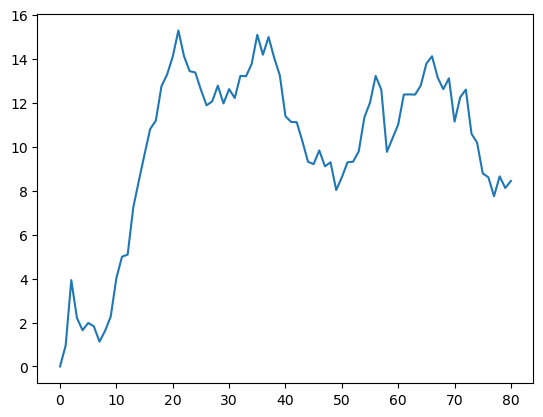

In [563]:
random_walk.plot()

<AxesSubplot:>

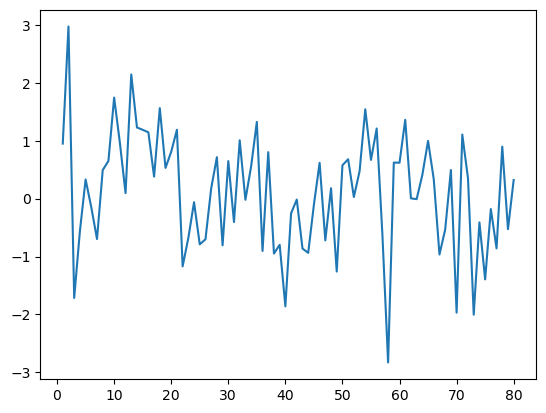

In [564]:
random_walk.diff().plot()

### MARK: Check Stationarity

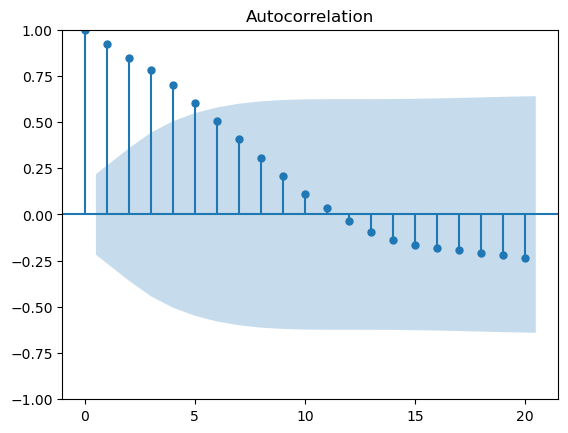

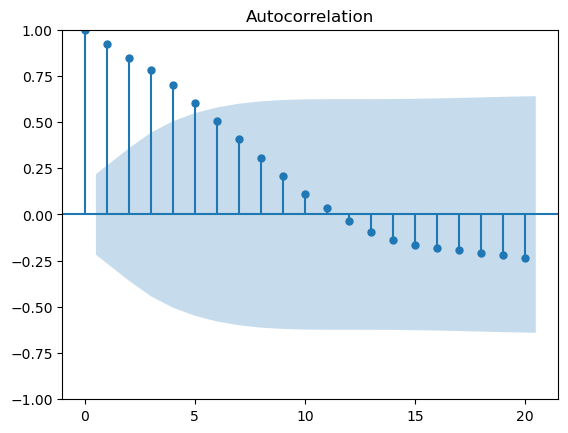

In [565]:
plot_acf(random_walk)

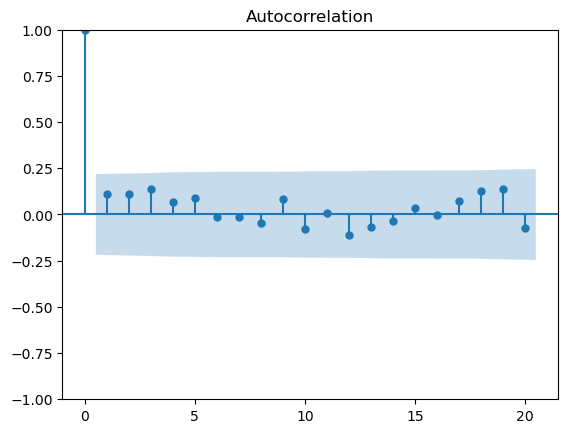

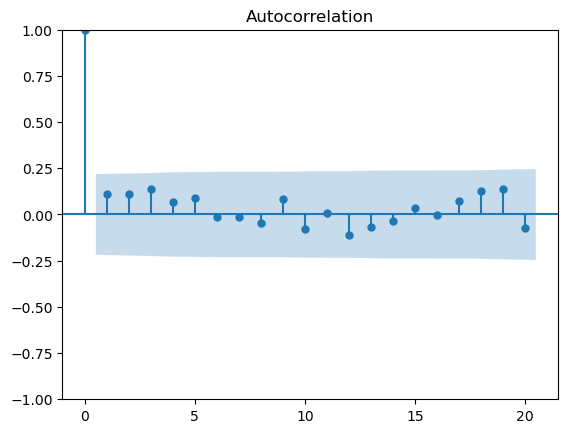

In [566]:
plot_acf(random_walk.diff().dropna())
#เป็น Stationarity แล้วถ้าไม่มีตัวหลุดพื้นที่สีฟ้าเยอะๆ หลายตัว

In [567]:
adfuller(random_walk.diff().dropna()) #p-value น้อยกว่า 0.05 ยืนยันว่า Stationarity แล้ว

(-7.890237816097917,
 4.456644328388728e-12,
 0,
 79,
 {'1%': -3.5159766913976376,
  '5%': -2.898885703483903,
  '10%': -2.5866935058484217},
 185.7291250348573)

## MARK: ARIMA Family Model
โมเดล ARIMA (AutoRegressive Integrated Moving Average) และครอบครองโมเดลในครอบครอง ARIMA รวมถึง SARIMA (Seasonal ARIMA) และ SARIMAX (Seasonal ARIMA with Exogenous Variables) มักถูกใช้ในการตรวจสอบ Stationarity และปรับข้อมูลเวลาให้เป็นคงที่ (stationary) ก่อนที่จะนำมาวิเคราะห์และโมเดล

### Moving Average Model

In [568]:
widget = pd.read_csv("widget_sales.csv")
widget

,widget_sales
0,50.496714
1,50.805493
2,51.477758
3,53.542228
4,54.873108
...,...
495,64.087371
496,63.992081
497,63.029894
498,61.671797


<AxesSubplot:>

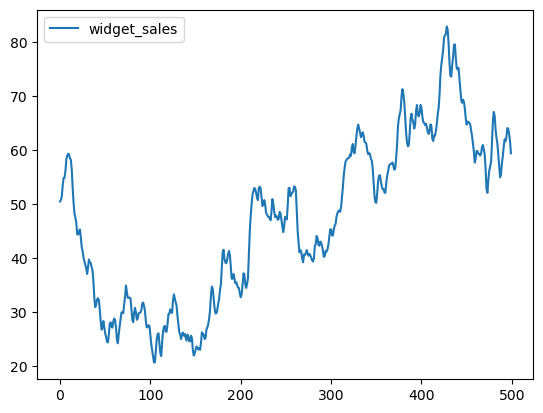

In [569]:
widget.plot()

#### Split data

In [570]:
widget_train = widget[:450]
widget_test = widget[450:]

In [571]:
widget_train

,widget_sales
0,50.496714
1,50.805493
2,51.477758
3,53.542228
4,54.873108
...,...
445,68.790650
446,69.368613
447,68.959573
448,67.709794


In [572]:
widget_test

,widget_sales
450,64.736005
451,65.316972
452,65.172070
453,65.075506
454,64.703173
455,63.584282
456,62.604589
457,61.235157
458,59.717681
459,57.710946


#### Check Stationarity

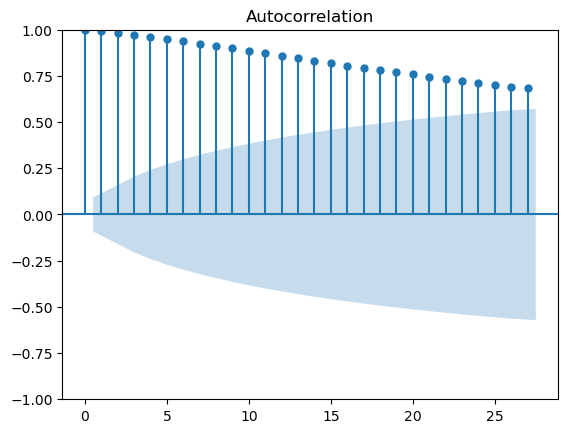

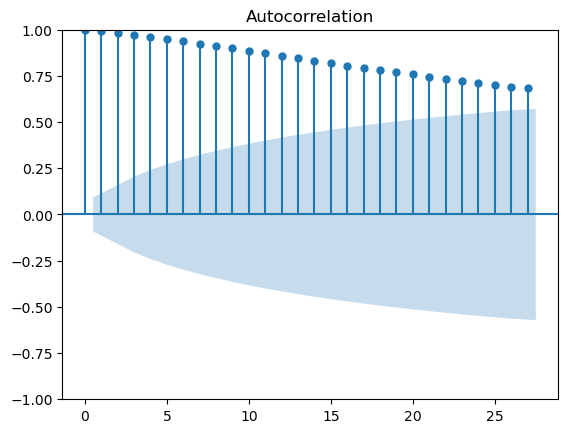

In [573]:
plot_acf(widget_train)

In [574]:
adfuller(widget_train) # 0.6688 ยังไม่ Stationarity

(-1.2109796621842874,
 0.6688547943380219,
 3,
 446,
 {'1%': -3.4450973903602367, '5%': -2.868042229965336, '10%': -2.570233448893},
 1206.159853383307)

In [575]:
adfuller(widget_train.diff().dropna()) # 1.0743182765603936e-17 Stationarity แล้ว

(-10.098597045268308,
 1.0743182765603936e-17,
 2,
 446,
 {'1%': -3.4450973903602367, '5%': -2.868042229965336, '10%': -2.570233448893},
 1201.0222006719118)

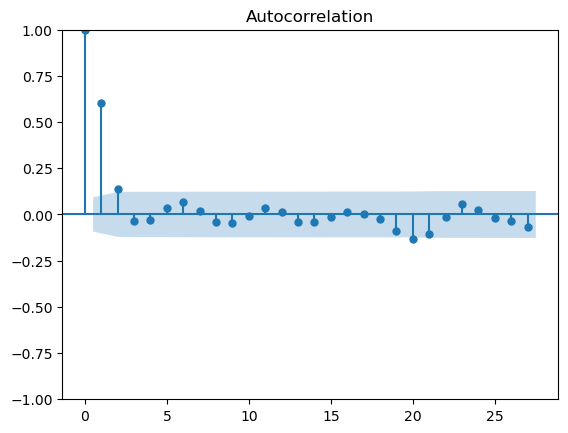

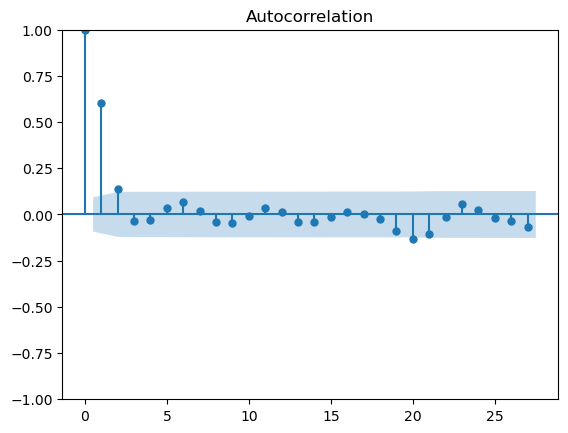

In [576]:
plot_acf(widget_train.diff().dropna()) 
# lags ส่วนใหญ่อยู่ในพื้นที่สีฟ้า มีจุด peak 1 หรือ 2(จุดสองตามแต่ผู้วิเคราะห์ตัดสินใจว่าเป็นความบังเอิญไหม) จุด ไม่นับอันแรก ในที่นี้เรามองว่าเป็น MA

#### Fit MA Model

In [577]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [578]:
# deff_widget = widget_train.diff().dropna()
# ma_model = SARIMAX(deff_widget, order=(0,0,2)) # p = 0, d = 0, q = 2
ma_model = SARIMAX(widget_train, order=(0,1,2)) #ถ้าโยนแบบไม่ diff ให้ใส่ d = 1 เดี๋ยว model diff ให้เอง

In [579]:
fitted_ma = ma_model.fit()

In [581]:
widget_train[-2:]

,widget_sales
448,67.709794
449,65.906136


In [588]:
# fitted_ma.forecast(steps=4) #forecast ไปอนาคต 4 step
# MA(q) Model can forecast only q steps 
# 452-453 เลยได้เท่าเดิม
# ค่าที่ได้จากการทำนายนำไปใช้ได้เลย

forecast = fitted_ma.get_forecast(steps = 4)
forecast.predicted_mean

450    64.827303
451    64.553995
452    64.553995
453    64.553995
Name: predicted_mean, dtype: float64

In [589]:
forecast.conf_int()

,lower widget_sales,upper widget_sales
450,62.924504,66.730103
451,60.531172,68.576817
452,58.862497,70.245493
453,57.582395,71.525594
